# Pipeline构建训练模型
【任务目标】
城市租用自行车计划是在城市中部署若干个自助租车处。在这个由租车处组成的网络中使用者可自助租用、归还自行车。迄今为止，全世界已经有500多个自助自行车租用处。 本任务需要通过给予的历史数据（包括天气、时间、季节等特征）使用Pipeline构建回归模型预测特定条件下的租车数目

## 1.加载数据

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('data/daily-bike-share.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  rentals     731 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.1+ KB


In [2]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


## 2、数据集理解

    mnth：代表数据月份，1~12 月

    season：数据记录时的季节

    1 为春季
    2 为夏季
    3 为秋季
    4 为冬季
    hodliday：当日是否为假期

    1代表是
    0代表不是
    weekday：星期中的哪一天，0~6分别对应周一到周末

    workingday：当日是否为工作日，即不是周末也不是假期

    1代表是
    0代表不是
    weathersit:当日天气：

    1: 天气晴朗或者少云/部分有云
    2: 有雾和云/风等
    3: 小雪/小雨，闪电及多云
    4: 大雨/冰雹/闪电和大雾/大雪
    temp - 当日摄氏温度

    atemp - 当日人们感觉的温度

    hum - 当日湿度

    windspeed - 风速

    rentals：目标变量，总租车数，也是我们需要预测的值

In [3]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
rentals       0
dtype: int64

## 3、提取有效特征

In [4]:
data = data[['season'
             , 'mnth'
             , 'holiday'
             , 'weekday'
             , 'workingday'
             , 'weathersit'
             , 'temp'
             , 'atemp'
             , 'hum'
             , 'windspeed'
             , 'rentals']]
data.head()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


## 4、拆分数据集

In [5]:
from sklearn.model_selection import train_test_split
X = data.drop('rentals',axis=1)
# 特征中去掉目标变量
y = data['rentals']
# 目标变量
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2,  # 8:2 划分数据
                                                    random_state=123)

In [6]:
X.shape

(731, 10)

In [7]:
X_train.shape

(584, 10)

## 5、Pipeline使用方法
Pipeline可以将数据预处理、建模、预测的各种流程包装成一个管线（流水线），通过制定管线上每个步骤的名称和对应的操作，可以对数据集进行快速统一的处理，方便提高建模的效率

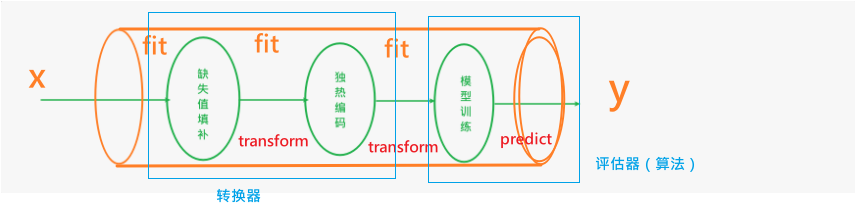

    Pipeline(steps=[('name_of_preprocessor', preprocessor),
                    ('name_of_ml_model', ml_model())])
                    
- name_of_preprocessor：自定义Pipeline步骤名称
- preprocessor：实现数据预处理的操作
- name_of_ml_model：选择模型的名称
- ml_model()：模型实例化

## 6、导入模块

In [8]:
# 标准化、顺序编码
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
# OrdinalEncoder ：顺序编码，类似LabelEncoder，特征专用，
# 能够将字符串分类变量转换为数值型分类变量

# SimpleImputer 填充缺失值
from sklearn.impute import SimpleImputer

# 对特征应用某种数据预处理操作
from sklearn.compose import ColumnTransformer

# Pipeline模型构造器
from sklearn.pipeline import Pipeline

## 7、Pipeline定义数据预处理流程

处理缺失值及数据标准化

    SimpleImputer(
        *,
        missing_values=nan,  # 对缺失值的定义，默认是np.nan
        strategy='mean',    # 对缺失值的填充方式，可以选择均值、中位数、众数或自定义值
        fill_value=None,    # 设置自定义填充时给出的填充值
        verbose=0,
        copy=True,
        add_indicator=False,
    )
    
    # strategy : str, default='mean'
    The imputation strategy.

    - If "mean", then replace missing values using the mean along
      each column. Can only be used with numeric data.
    - If "median", then replace missing values using the median along
      each column. Can only be used with numeric data.
    - If "most_frequent", then replace missing using the most frequent
      value along each column. Can be used with strings or numeric data.
      If there is more than one such value, only the smallest is returned.
    - If "constant", then replace missing values with fill_value. Can be
      used with strings or numeric data.


In [9]:
# 定义一个针对连续变量的Pipeline操作
numeric_transformer = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='mean'))
      ,('scaler', StandardScaler())
])
# 1.缺失值（如果有）以均值填充
# 2.对连续变量做z标准化转换

In [10]:
# 定义一个针对分类变量的Pipeline操作
categorical_transformer = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='most_frequent'))
      ,('encoder', OneHotEncoder())
])
# 1.缺失值以众数填充
# 2.对分类变量做独热编码处理

筛选连续型变量及类别型变量使用上述定义的数据预处理流程

In [11]:
# 连续型变量
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
# 类别型变量
categorical_features = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
# 分别针对连续型变量和类别型变量使用不同的预处理过程
preprocessor = ColumnTransformer(
   transformers=[
    ('numeric',numeric_transformer, numeric_features)
   ,('categorical', categorical_transformer, categorical_features)
]) 

In [12]:
preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['temp', 'atemp', 'hum', 'windspeed']),
                                ('categorical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder', OneHotEncoder())]),
                                 ['season', 'mnth', 'holiday', 'weekday',
                                  'workingday', 'weathersit'])])

## 8、Pipeline构建

使用Pipeline定义模型

In [13]:
from sklearn.ensemble import RandomForestRegressor
rf_model = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('regressor',RandomForestRegressor())
           ])
# 先按照preprossor的设定进行连续变量和分类变量的预处理操作
# 再调用指定的算法进行建模

In [14]:
rf_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['temp', 'atemp', 'hum',
                                                   'windspeed']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  ['season', 'mnth', 'holiday',
                                                   'weekday', 'workingday',
                                                   'weathersit'])])),
                ('regressor', RandomForestRegressor())])

模型训练

In [15]:
rf_model.fit(X_train, y_train)
# 操作完成后，最终得到一个训练好的包含转换器的随机森林回归模型

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['temp', 'atemp', 'hum',
                                                   'windspeed']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  ['season', 'mnth', 'holiday',
                                                   'weekday', 'workingday',
                                                   'weathersit'])])),
                ('regressor', RandomForestRegressor())])

在测试集上用模型进行预测

In [16]:
y_pred = rf_model.predict(X_test)

In [17]:
y_pred

array([ 731.48,  499.08,  644.73,  344.92,  994.66, 1926.76,  503.11,
        815.9 ,  913.52,  335.32,  562.21, 1524.55, 2599.5 , 1218.2 ,
        268.16,  891.91, 1451.87, 1981.77,  762.01,  715.09, 2384.16,
       2094.92,   51.23,  928.2 ,  848.07,  208.22,  756.44,   76.11,
        716.89,  583.37, 1180.41,  682.77, 1056.34, 1130.14, 1229.57,
       1163.36,  833.65,  722.06,  886.58,  277.17,  787.23,  102.43,
        273.33,  673.53,  488.68,  692.93,  743.41,  797.64,  258.85,
        163.13,  525.11,  350.57,  835.76,  421.36,  796.35,  830.67,
       1328.96,  847.16,  717.19, 1151.07, 1036.66,  200.44,  676.78,
       1989.22, 1463.33,  137.8 ,   66.17,  503.64,  290.1 , 1857.02,
        810.31,  329.96, 1048.52,  807.54,  150.71,  669.56,  147.19,
        529.51, 1094.04,  268.37,  622.48,  647.1 ,  697.99,  790.  ,
       1552.73,  876.44,  320.89, 1027.78, 1035.22,  230.98,  823.71,
       2309.31,  507.46,  472.04,  313.69, 2138.9 ,  230.54,  752.4 ,
        686.01,  571

模型效果评估

In [18]:
y_test

488     764
421     515
91      898
300     456
177     854
       ... 
631    2454
548     904
439    1005
449    1532
124     614
Name: rentals, Length: 147, dtype: int64

In [19]:
from sklearn.metrics import r2_score
# r方：决定系数，说明回归方程能解释多大程度的因变量变异
# 取值范围为[0,1]，值越大越好
predictions = rf_model.predict(X_test)
print (r2_score(y_test, predictions))

0.769470258458264


用线性回归模型和随机森林模型进行比较

In [20]:
from sklearn.linear_model import LinearRegression
# 线性回归算法
lm_model = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('regressor',LinearRegression())
           ])
# 先按照preprossor的设定进行连续变量和分类变量的预处理操作
# 再调用线性回归算法进行建模

In [21]:
lm_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['temp', 'atemp', 'hum',
                                                   'windspeed']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  ['season', 'mnth', 'holiday',
                                                   'weekday', 'workingday',
                                                   'weathersit'])])),
                ('regressor', LinearRegression())])

In [22]:
# 训练
lm_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['temp', 'atemp', 'hum',
                                                   'windspeed']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  ['season', 'mnth', 'holiday',
                                                   'weekday', 'workingday',
                                                   'weathersit'])])),
                ('regressor', LinearRegression())])

In [23]:
# 预测
y_pred_lm = lm_model.predict(X_test)

In [24]:
y_pred_lm

array([ 837.75871883,  942.03330476, 1253.4982359 ,  503.62845372,
        910.47499502, 1667.39058505,  852.60960356,  746.24008214,
        908.5138068 ,  302.18885729,  353.4755074 , 1141.4139334 ,
       1824.47944786, 1422.06790131,  225.93261534,  806.67223855,
       1565.20753783, 1905.53606299,  993.47091291,  702.54253721,
       1849.04398129, 1924.70153494, -457.87954172, 1065.5784828 ,
        755.90553987,  -32.71908631,  802.32484659, -298.5972364 ,
        863.73879237,  732.75027644, 1385.71298486,  781.91390379,
       1086.42335861, 1669.56841025, 1242.03386369, 1421.34315374,
       1050.75382478,  800.56920016,  973.0806838 ,  295.68406808,
       1013.6035439 ,    5.1107286 ,   99.06546422,  610.99767378,
        753.13378093,  784.4335033 ,  747.57464784, 1027.30711153,
        168.71791238, -197.82499676,  783.63744393,  411.99197186,
        839.06009568,  326.26350624,  893.81274934,  738.44431417,
       1367.91622066,  908.24794452,  453.11749239, 1193.04164

In [25]:
# 评估线性回归模型的效果
r2_score(y_test, y_pred_lm)

0.6320200254585342

从r2来看，随机森林的模型效果优于线性回归模型的效果